## Importing the Dataset

In [126]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [127]:
df = pd.read_csv("../dataset/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [128]:
df.shape

(13320, 9)

In [129]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

## Data Cleaning

### Removing attributes that won't be used to prediction.

In [130]:
df2 = df.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### Removing null rows

In [131]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [132]:
df3 = df2.dropna()
df3.isnull().sum()  

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [133]:
df3.shape

(13246, 5)

### Transforming the BHK (Bedrooms, Halls, Kitchens) to integer

It's necessary 'cause the the prediction model features can only be integers.

In [134]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [196]:
df3.loc[:, 'bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

In [136]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [137]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [138]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


### Transforming the Square Feet to float

Some entries in the dataset are in the format '1355-8346'. As mentioned earlier, the model exclusively processes numerical values.

In [139]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [140]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [141]:
# Only shows the rows where total_sqft is not a float
df3[~df3['total_sqft'].apply(isFloat)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [142]:
# Convert range to single value
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [143]:
convert_sqft_to_num('2326')

2326.0

In [144]:
convert_sqft_to_num('3067 - 8156')

5611.5

In [145]:
#  Some entries are like this, and our function won't be able to convert them. We need to drop them after aplying the function on the column.
convert_sqft_to_num('34.46Sq. Meter')

In [146]:
# Copying the dataframe
df4 = df3.copy()
# Applying the sqtf convert function to the total_sqft column
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


### Removing null rows after transforming the square feet

In [147]:
df4.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [148]:
# Dropping the rows where total_sqft is null
df5 = df4.dropna()
df5.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [149]:
df5.shape

(13200, 6)

## Feature Engineering

### Getting the price per feet

In [150]:
df6 = df5.copy()
df6['price_per_sqft'] = df6['price']*100000/df5['total_sqft']
df6.head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


### Transforming the location variable

This attribute is categorical, so we need to evaluate if applying dimensionality reduction is necessary, as it could potentially impact the model's performance.


In [151]:
len(df6['location'].unique())

1298

We've so many locations, it wouldn't be optimal applying the encode 'cause it woulde be so many values.

So we need to get the count of which location.

In [152]:
df6.location = df6.location.apply(lambda x: x.strip())
locations_count = df6.groupby('location')['location'].agg('count').sort_values(ascending=False)
locations_count

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [153]:
len(locations_count[locations_count<=10])

1047

Out of 1298 occurrences, 1047 have counts below 10. To improve the model's performance, we will drop the rows where the location count is less than 10.

In [154]:
location_stats_less_than_10 = locations_count[locations_count<=10]
location_stats_less_than_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [155]:
df6.location = df6.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df6.location.unique())

241

## Outliers

### Removing suspicious houses

When discussing with a business manager experienced in real estate, they might mention that typically, there's an expectation of 300 square feet per bedroom (e.g., a 2 BHK apartment would have a minimum of 600 sqft). 

For instance, if there's a 2 BHK apartment with only 400 sqft, that could be considered suspicious and flagged as an outlier. 

To handle this, we'll set our minimum threshold per BHK at 300 sqft and remove such outliers from the dataset.

#### Displaying the suspicious values

In [156]:
display(df6[df6.total_sqft/df6.bhk<300].head())
display(f'Number of rows: {len(df6[df6.total_sqft/df6.bhk<300])}')

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


'Number of rows: 744'

In [157]:
import plotly.express as px

fig = px.scatter(
    x=df6.total_sqft,
    y=df6.bhk,
    # If the condition is true, the marker will be red. Otherwise, it will be blue.
    # So it means that the suspicious rows will be red.
    color=df6["total_sqft"] / df6["bhk"] < 300,
)
fig.update_traces(
    marker=dict(
        size=10,
        line=dict(
            width=1,
            color="DarkSlateGrey",
        ),
    ),
    selector=dict(mode="markers"),
)
fig.update_layout(
    title="Total Square Footage vs. Number of Rooms",
    xaxis_title="Total Square Footage",
    yaxis_title="Number of Rooms",
)
fig.show()

In [158]:
df7 = df6[~(df6.total_sqft/df6.bhk<300)]
df7.shape

(12456, 7)

### Removing outliers at Price per Feet by standard deviation and mean.

In [159]:
df7.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [160]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    # for each location in the dataframe
    for key, subdf in df.groupby('location'):
        # mean value of price_per_sqft
        m = np.mean(subdf.price_per_sqft)
        # standard deviation of price_per_sqft
        st = np.std(subdf.price_per_sqft)
        # filter out the rows with price_per_sqft in the range of (m-st, m+st)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        # append the filtered rows to the new dataframe
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df8 = remove_pps_outliers(df7)
display(f'Old shape: {df7.shape}')
display(f'Old shape: {df7.shape}')

'Old shape: (12456, 7)'

'Old shape: (12456, 7)'

### Removing outliers at BHK by standard deviation and mean

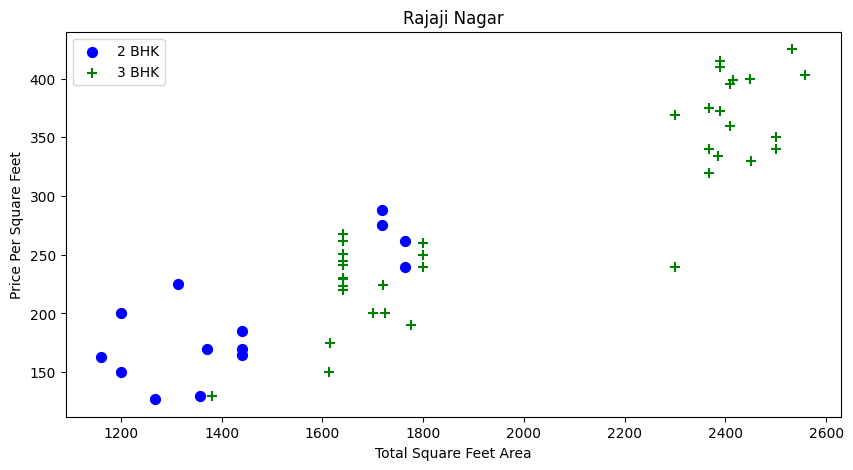

In [161]:
def plot_scatter_chat(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (10,5)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    
plot_scatter_chat(df8,"Rajaji Nagar")

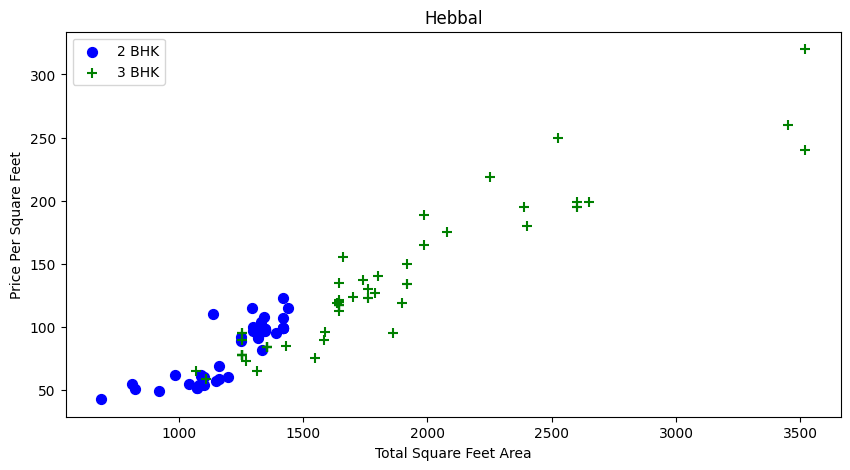

In [162]:
plot_scatter_chat(df8,"Hebbal")

In [163]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
    
df9 = remove_bhk_outliers(df8)
df9.shape

(7317, 7)

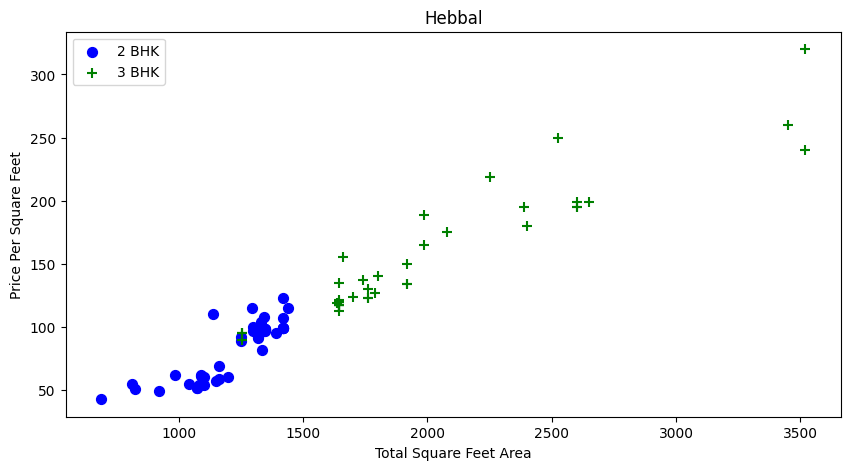

In [164]:
plot_scatter_chat(df9,"Hebbal")

In [165]:
fig2 = px.histogram(
    df9,
    x="price_per_sqft",
    nbins=15,
    title="Distribution of Prices",
    template="plotly_white",
    color_discrete_sequence=["#0077b6"],
)
fig2.update_layout(
    title_x=0.5,
    xaxis_title="Price Per Square Feet",
    yaxis_title="Count",
    font=dict(family="Arial", size=14, color="black"),
    legend=dict(
        x=0.5,
        y=0.95,
        traceorder="normal",
        font=dict(family="Arial", size=14, color="black"),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2,
    ),
)
fig.update_layout(bargap=0.5)
fig2.show()

### Removing outliers by Bathroom quantity

In [166]:
df9.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [167]:
display(df9[df9.bath>10])
display(f'Number of rows: {len(df9[df9.bath>10])}')

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


'Number of rows: 5'

In [168]:
fig3 = px.histogram(
    df9,
    x="bath",
    nbins=15,
    title="Distribution of Bathrooms",
    template="plotly_white",
    color_discrete_sequence=["#0077b6"],
)
fig3.show()

In [169]:
display(df9[df9.bath>df9.bhk+2])
display(f'Number of rows: {len(df9[df9.bath>df9.bhk+2])}')

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


'Number of rows: 4'

In [170]:
df10 = df9[df9.bath<df9.bhk+2]
df10.shape

(7239, 7)

## Creating the model

### Removing size and price_per_sqft variables.

In [171]:
df11 = df10.drop(['size','price_per_sqft'],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


### Applying OneHotEncode on location

In [172]:
# one hot encoding
dummies = pd.get_dummies(df11.location, dtype=int)
dummies.head(20)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
df12 = pd.concat([df11,dummies.drop('other',axis='columns')],axis='columns')
df12.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
df13 = df12.drop('location',axis='columns')
df13.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
df13.shape

(7239, 244)

### Splitting the dataset into train and test

In [176]:
X = df13.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
y = df13.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

### Creating and Evaluating the Linear Regression model

In [179]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.862913224522947

In [180]:
predictions = lr_clf.predict(X_test)

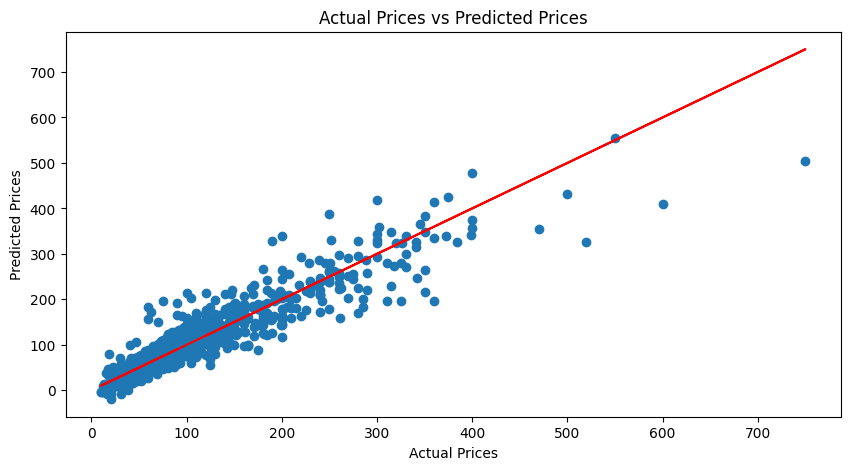

In [181]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [182]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

### Comparing Linear Regression with Lasso and Decision Tree

In [183]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        "linear_regression": {
            "model": LinearRegression(),
            "params": {
                "copy_X": [True, False],
                "fit_intercept": [True, False],
                "n_jobs": [None, 1, 2],
            },
        },
        "lasso": {
            "model": Lasso(),
            "params": {
                "alpha": [1, 2],
                "selection": ["random", "cyclic"],
            },
        },
        "decision_tree": {
            "model": DecisionTreeRegressor(),
            "params": {
                "criterion": ["friedman_mse"],
                "splitter": ["best", "random"],
            },
        },
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(
            config["model"],
            config["params"],
            cv=cv,
            return_train_score=False,
            error_score="raise",
        )
        gs.fit(X, y)
        scores.append(
            {
                "model": algo_name,
                "best_score": gs.best_score_,
                "best_params": gs.best_params_,
            }
        )

    return pd.DataFrame(scores, columns=["model", "best_score", "best_params"])

In [184]:
find_best_model_using_gridsearchcv(X, y)

,model,best_score,best_params
0,linear_regression,0.847951,"{'copy_X': True, 'fit_intercept': False, 'n_jo..."
1,lasso,0.726823,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.662865,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


### Testing with new values

In [189]:
lr_clf = LinearRegression()
lr_clf.fit(X_train.values,y_train)

def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [190]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

83.86570258320462

In [191]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

86.08062284995188

In [192]:
predict_price('Indira Nagar',1000, 2, 2)

193.31197733179715

In [193]:
predict_price('Indira Nagar',1000, 3, 3)

195.5268975985444

### Saving the model

In [194]:
import pickle
with open('../backend/banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [195]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("../backend/columns.json","w") as f:
    f.write(json.dumps(columns))